In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt 
from matplotlib.patches import Rectangle
from IPython.display import Image, display
import pandas as pd

#### Functions

In [2]:
def draw_patches(fmask, ll, ul, u_lons, w_depths,m2lon,back=False):
    topo = []
    if back == False: 
        for i in range(ll, ul+1):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-1]/m2lon, w_depths[j]), u_lons[i]/m2lon-u_lons[i-1]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass
    else:
         for i in range(ll, ul+2):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-2]/m2lon, w_depths[j]), u_lons[i-1]/m2lon-u_lons[i-2]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass         
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
    return(pc)

#TODO: Rename this function (in all files)
def plotCS(axv,lonsec,zsec,transpsec,lonW,lonE,latgridi,depi,vmax,time,title,cblabel,ylabel,NW=False):
    
    if NW == True:
        latgridf = latgridi-1 #actually lon
        fmask = mesh.fmask[0,:,:,latgridf] # Giving mask of longitudes
        tmask = mesh.tmask[0]
        
        lons = data.init_lat[(data.final_section != 0)]
        
        f_lons = mesh.glamf[0,:, latgridf]
        u_lons = mesh.glamv[0,:, latgridf]
        w_depths = mesh.gdepw_1d
    else:
        latgridf = latgridi-1
        fmask = mesh.vmask[0, :, latgridf]
        tmask = mesh.tmask[0]
            
        lons = data.init_lon[(data.final_section != 0)]
            
        f_lons = mesh.glamf[0, latgridf]
        u_lons = mesh.glamv[0, latgridf]
        w_depths = mesh.gdepw_1d

    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    cmap = cm.dense
    
    arr,xe,ye,im = axv.hist2d(lonsec/m2lon,df(zsec-1)[0],weights=transpsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE+1:1]/m2lon),w_depths[0,0:depi+1]],
                              density=True,vmax=vmax
                                )
    
    X,Y = np.meshgrid(xe,ye)
    
    try:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time).values,cmap=cmap,vmax=vmax)
    except:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time),cmap=cmap,vmax=vmax)
    
    axv.invert_yaxis()
    axv.set_title(title)
    if NW==True:
        axv.set_xlabel('Latitude (°N)')
    else:
        axv.set_xlabel('Longitude (°W)')
    axv.set_xticks(np.linspace(f_lons[lonW+3]/m2lon,f_lons[lonE-3]/m2lon,2))
    axv.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
    axv.set_xticklabels(['{:.2f}'.format(abs(label)) for label in np.linspace(f_lons[lonW+3],f_lons[lonE-3],2)])
    axv.set_xticklabels(np.round(np.linspace(np.abs(f_lons[lonW+3]),np.abs(f_lons[lonE-3]),2),2))
    
    pc = draw_patches(fmask, lonW, lonE, np.array(f_lons), np.array(w_depths[0]),m2lon)
    axv.add_collection(pc)

    if cblabel == True:
        cb = fig.colorbar(im,ax=axv)
        cb.set_label(f'Transport (m s$^{{-1}}$) \n')
    
    if ylabel == True:
        axv.set_ylabel('Depth (m)')
        
    else: 
        axv.set_yticklabels([])

In [3]:
def plotCS2(axv,lonsec,zsec,transpsec,lonW,lonE,latgridi,depi,vmax,time,title,cblabel,ylabel,NW=False,cfig=False):
    
    if NW == True:
        latgridf = latgridi-1 #actually lon
        fmask = mesh.fmask[0,:,:,latgridf] # Giving mask of longitudes
        tmask = mesh.tmask[0]
        
        lons = data.init_lat[(data.final_section != 0)]
        
        f_lons = mesh.gphif[0,:, latgridf]
        u_lons = mesh.gphiv[0,:, latgridf]
        w_depths = mesh.gdepw_1d
    else:
        latgridf = latgridi-1
        fmask = mesh.vmask[0, :, latgridf]
        tmask = mesh.tmask[0]
            
        lons = data.init_lon[(data.final_section != 0)]
            
        f_lons = mesh.glamf[0, latgridf]
        u_lons = mesh.glamv[0, latgridf]
        w_depths = mesh.gdepw_1d

    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    cmap = cm.dense
    
    arr,xe,ye,im = axv.hist2d(lonsec/m2lon,df(zsec-1)[0],weights=transpsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE+1:1]/m2lon),w_depths[0,0:depi+1]],
                              density=True,vmax=vmax
                                )
    
    X,Y = np.meshgrid(xe,ye)
    
    try:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time).values,cmap=cmap,vmax=vmax)
    except:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time),cmap=cmap,vmax=vmax)
    
    axv.invert_yaxis()
    axv.set_title(title)
    axv.set_xlabel('Longitude (°W)')
    axv.set_xticks(np.linspace(f_lons[lonW]/m2lon,f_lons[lonE]/m2lon,2))
    axv.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
    axv.set_xticklabels(['{:.2f}'.format(abs(label)) for label in np.linspace(f_lons[lonW],f_lons[lonE],2)])
    axv.set_xticklabels(np.round(np.linspace(np.abs(f_lons[lonW]),np.abs(f_lons[lonE]),2),2))
    labs1 = np.round(np.linspace(np.abs(f_lons[lonW]),np.abs(f_lons[lonE]),2),2)
    axv.set_xticklabels(['      '+str(labs1[0]), '         '+ str(labs1[1])])
    # axv.set_xticklabels(['W','E'])
    
    pc = draw_patches2(fmask, lonW, lonE, np.array(f_lons), np.array(w_depths[0]),m2lon)
    axv.add_collection(pc)  
    
    if cblabel == True:
        if cfig == True:
            plt.colorbar()
        else:
            cb = fig.colorbar(im,ax=axv)
            cb.set_label(f'Transport (m s$^{{-1}}$)')
        
    
    if ylabel == True:
        axv.set_ylabel('Depth (m)')
        
    else: 
        axv.set_yticklabels([])
      
      
latsjc = 281
lonWsjc = 261
lonEsjc = 267
  
def draw_patches2(fmask, ll, ul, u_lons, w_depths,m2lon):
    transpd = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/sjctovs3_final_transp.csv')['jun'].dropna()
    lond = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/sjctovs3_final_lon.csv')['jun'].dropna()
    zd = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/sjctovs3_final_z.csv')['jun'].dropna()

    arr,xe,ye,im = ax.hist2d(lond/m2lon,df(zd-1)[0],weights=transpd,bins=[np.array(u_lons[261:267+1:1]/m2lon),w_depths[0:38+1]],
                              density=True,vmax=0.15
                                )
    
    transp = arr.T*np.sum(transpd/23)
    
    topo = []
    for i in range(ll-ll, ul-ll):
        for j in range(39-1):
            if ((transp)[j, i] == 0) and (((fmask)[j, i] == 0)):
                try:
                    rect = Rectangle((u_lons[i+ll]/m2lon, w_depths[j]), u_lons[i+ll+1]/m2lon-u_lons[i+ll]/m2lon, w_depths[j+1]-w_depths[j])
                    topo.append(rect)
                except:
                    pass

    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
    return(pc)

# def draw_patches(fmask, ll, ul, u_lons, w_depths,m2lon,back=False):
#     topo = []
#     if back == False: 
#         for i in range(ll, ul+1):
#             for j in range(39):
#                 if (fmask[j, i]== 0):
#                     try:
#                         rect = Rectangle((u_lons[i-1]/m2lon, w_depths[j]), u_lons[i]/m2lon-u_lons[i-1]/m2lon, w_depths[j+1]-w_depths[j])
#                         topo.append(rect)
#                     except:
#                         pass
#     else:
#          for i in range(ll, ul+2):
#             for j in range(39):
#                 if (fmask[j, i]== 0):
#                     try:
#                         rect = Rectangle((u_lons[i-2]/m2lon, w_depths[j]), u_lons[i-1]/m2lon-u_lons[i-2]/m2lon, w_depths[j+1]-w_depths[j])
#                         topo.append(rect)
#                     except:
#                         pass         
#     pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
#     return(pc)

### Import data

In [4]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
df = interp.interp1d(mesh.z,mesh.gdepw_1d) # Interpolate to get same binning scheme as SalishSeaCast

In [5]:
file1 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/prtoadm_haro_finalsalt.csv')
file2 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/prtoadm_haro_finaltransp.csv')


pathway = ['vstoharo','vstoros','vstosjc','vstoadm','prtoharo','prtoros','prtosjc','prtogulf','harotovs','rostovs','sjctovs','admtovs','gulftoros','harotoros','sjctoros','prtoros_RS',
           'rostoadm','rostovs_RS','rostoharo','rostosjc','rostodec','vstoharo3','vstoros3','vstosjc3','vstoadm3','harotovs3','rostovs3',
           'sjctovs3','admtovs3','rostoadm3','rostovs3_RS','rostoharo3','rostosjc3','rostodec3']
variables = ['final_salt','final_transp','init_salt','init_transp','init_temp','final_lat','final_lon','init_lat','init_lon','init_z','final_z']
dict_all = {}
for pathw in pathway:
    dict_all[pathw] = {}
    for variable in variables:
        fpath = f'/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/{pathw}_{variable}.csv'
        dict_all[pathw][variable] = pd.read_csv(fpath)


In [6]:
dict_all.keys()

dict_keys(['vstoharo', 'vstoros', 'vstosjc', 'vstoadm', 'prtoharo', 'prtoros', 'prtosjc', 'prtogulf', 'harotovs', 'rostovs', 'sjctovs', 'admtovs', 'gulftoros', 'harotoros', 'sjctoros', 'prtoros_RS', 'rostoadm', 'rostovs_RS', 'rostoharo', 'rostosjc', 'rostodec', 'vstoharo3', 'vstoros3', 'vstosjc3', 'vstoadm3', 'harotovs3', 'rostovs3', 'sjctovs3', 'admtovs3', 'rostoadm3', 'rostovs3_RS', 'rostoharo3', 'rostosjc3', 'rostodec3'])

In [7]:
# lonWharo = 215
# lonEharo = 244
# latharo = 300
# lonWros=281
# lonEros=305
# latros = 267
# latsjc = 281
# lonWsjc = 261
# lonEsjc = 267
# lonWadm = 230
# lonEadm = 262
# latadm = 218
# lonWg1 = 234
# lonEg1 = 253
# latg1 = 386
# lonWpr = 260
# lonEpr = 310
# latpr = 386

lonWadm3 = 250
lonEadm3 = 268
latadm3 = 201
lonWharo = 215
lonEharo = 243
latharo = 300
lonWros=282
lonEros=305
latros = 267
latsjc = 281
lonWsjc = 261
lonEsjc = 267
lonWadm = 230
lonEadm = 262
latadm = 218
lonWg1 = 234
lonEg1 = 253
latg1 = 386
lonWpr = 260
lonEpr = 310
latpr = 386


months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
days_month = [31,28,31,30,31,30,31,31,30,31,30,31]

idx_dec = 0
idx_jun = 6

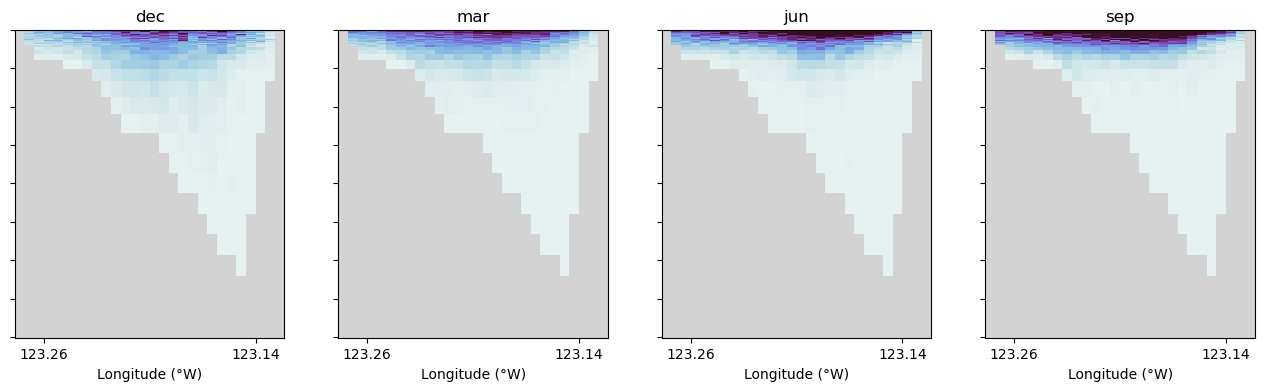

In [8]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(16,4))

for ii,ax in enumerate([ax1,ax2,ax3,ax4]):
    plotCS(ax,dict_all['prtoharo']['final_lon'][months[ii*3-1]].dropna(),dict_all['prtoharo']['final_z'][months[ii*3-1]].dropna(),dict_all['prtoharo']['final_transp'][months[ii*3-1]].dropna(),lonWharo,lonEharo,latharo,38,0.1,23*days_month[ii*3-1],months[ii*3-1],False,False)

/tmp/ipykernel_251949/2725436767.py:44: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.2,hspace=0.25)


Text(0.5, -0.05, '(c)')

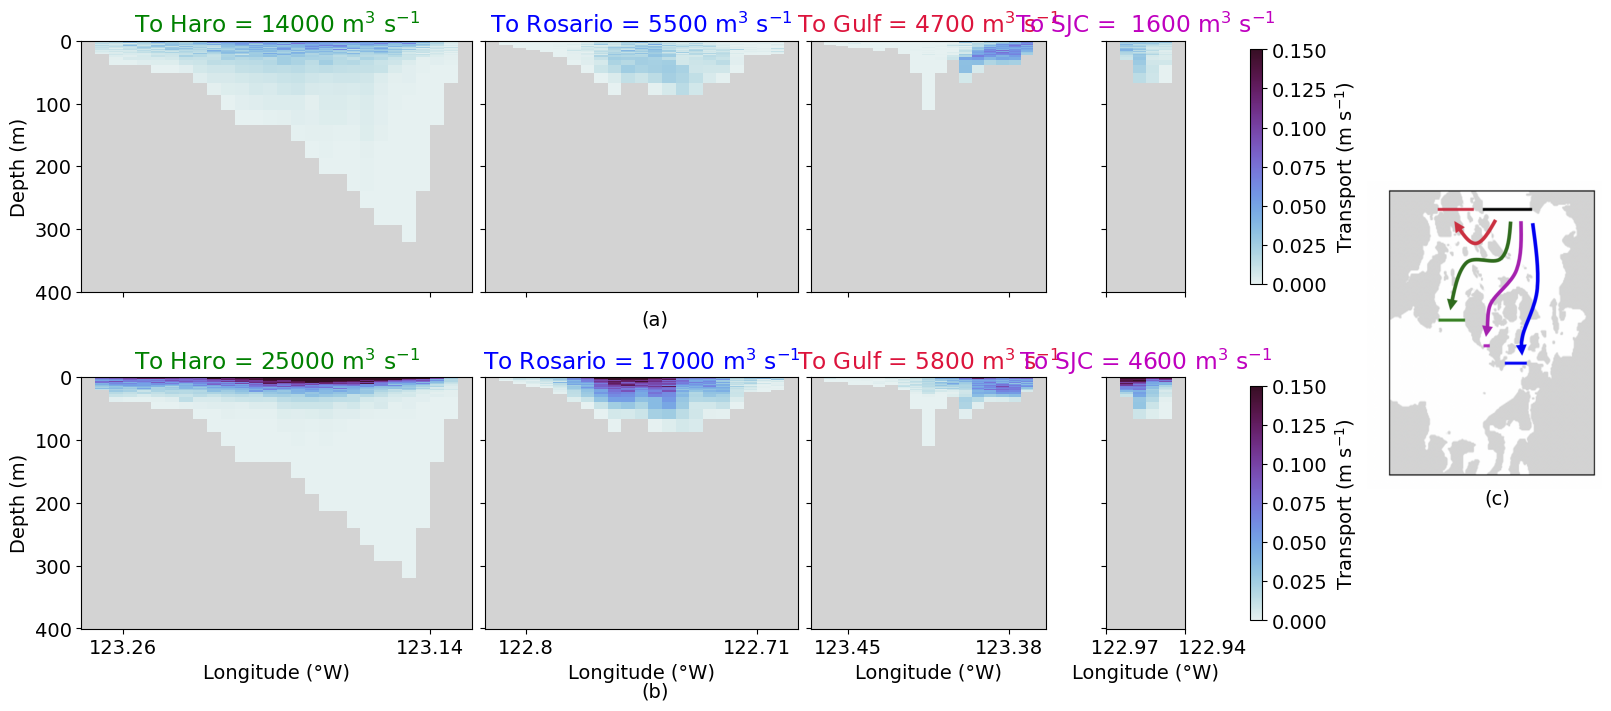

In [9]:
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 14})

title = 'To Haro = ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$ s$^{{-1}}$'
title2 = 'To Rosario = ' + str(int(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title3 = 'To SJC =  ' + str(int(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title4 = 'To Gulf = ' + str(int(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'

title5 = 'To Haro = ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title6 = 'To Rosario = ' + str(int(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title7 = 'To SJC = ' + str(int(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$ s$^{{-1}}$'
title8 = 'To Gulf = ' + str(int(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$ s$^{{-1}}$'

sum = 70
harolen =int(26/sum*14)
roslen = int(21/sum*14)
sjclen = int(5/sum*14)
gulflen = int(18/sum*14)
totalallen = harolen+roslen+sjclen+gulflen

fig = plt.figure(constrained_layout=True, figsize=[16,7])
gs = GridSpec(2,16, figure=fig)

ax1 = fig.add_subplot(gs[0, :harolen]) 
ax2 = fig.add_subplot(gs[0,harolen:harolen+roslen])
ax3 = fig.add_subplot(gs[0,harolen+roslen:harolen+roslen+gulflen])
ax4 = fig.add_subplot(gs[0,harolen+roslen+gulflen:harolen+roslen+gulflen+sjclen])
ax5 = fig.add_subplot(gs[1, :harolen]) 
ax6 = fig.add_subplot(gs[1,harolen:harolen+roslen])
ax7 = fig.add_subplot(gs[1,harolen+roslen:harolen+roslen+gulflen])
ax8 = fig.add_subplot(gs[1,harolen+roslen+gulflen:harolen+roslen+gulflen+sjclen])


plotCS(ax1,dict_all['prtoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_z'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_dec],title,False,True)
plotCS(ax2,dict_all['prtoros']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_dec],title2,False,False)
plotCS2(ax4,dict_all['prtosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_z'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['prtogulf']['final_lon'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_z'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_dec]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['prtoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_z'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_jun],title5,False,True)
plotCS(ax6,dict_all['prtoros']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_jun],title6,False,False)
plotCS2(ax8,dict_all['prtosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_z'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_jun],title7,True,False)
plotCS(ax7,dict_all['prtogulf']['final_lon'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_z'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_jun]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.2,hspace=0.25)

ax_center = fig.add_subplot(gs[:,harolen+roslen+gulflen+sjclen: ])

ax_center.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fpr.png'),zorder=0)
ax_center.axis('off');

ax1.set_title(title,color='green')
ax2.set_title(title2,color='b')
ax3.set_title(title4,color='crimson')
ax4.set_title(title3,color='m')
ax5.set_title(title5,color='green')
ax6.set_title(title6,color='b')
ax7.set_title(title8,color='crimson')
ax8.set_title(title7,color='m')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('');

ax2.text(0.5, -0.13, "(a)", transform=ax2.transAxes)
ax6.text(0.5, -0.27, "(b)", transform=ax6.transAxes)
ax_center.text(0.5, -0.05, "(c)", transform=ax_center.transAxes)

In [10]:
harolen =int(26/sum*16)
roslen = int(21/sum*16)
sjclen = int(7/sum*16)
gulflen = int(18/sum*16)
totalallen = harolen+roslen+sjclen+gulflen
totalallen

14

In [11]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/backVS_config3.png',bbox_inches='tight')

/tmp/ipykernel_251949/2279937485.py:122: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.12,hspace=0.25)


Text(0.5, -0.05, '(f)')

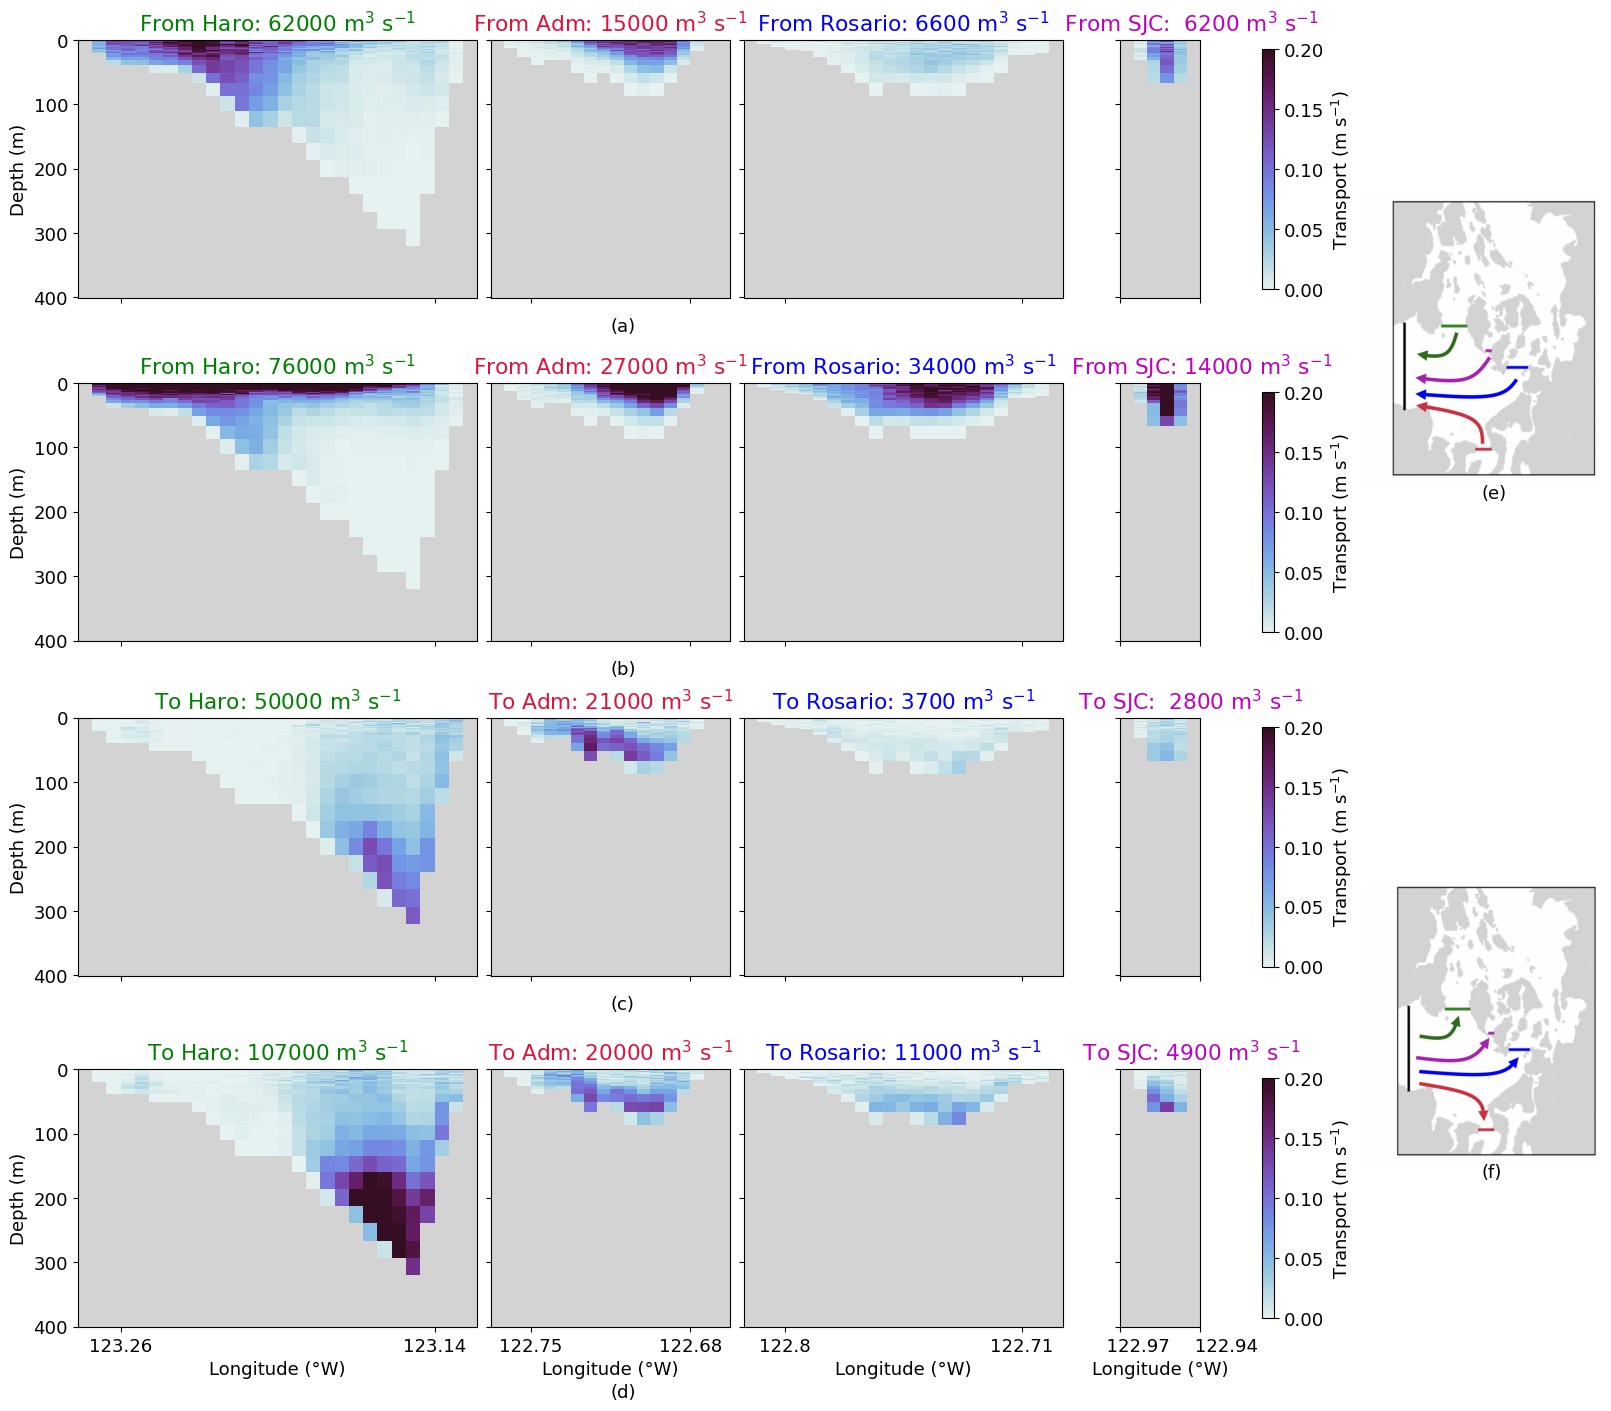

In [12]:
plt.rcParams.update({'font.size': 13})

title = 'From Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$ s$^{{-1}}$'
title2 = 'From Rosario: ' + str(int(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title3 = '         From SJC:  ' + str(int(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title4 = 'From Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$ s$^{{-1}}$'

title5 = 'From Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title6 = 'From Rosario: ' + str(int(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title7 = '            From SJC: ' + str(int(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title8 = 'From Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'

sum = 67
harolen =int(26/sum*14)
roslen = int(21/sum*14)
sjclen = int(5/sum*14)
admlen = int(15/sum*14)
totalallen = harolen+roslen+sjclen+admlen

fig = plt.figure(constrained_layout=True, figsize=[16,14])
gs = GridSpec(4,16, figure=fig)

ax1 = fig.add_subplot(gs[0, :harolen]) 
ax2 = fig.add_subplot(gs[0,harolen:harolen+admlen])
ax3 = fig.add_subplot(gs[0,harolen+admlen:harolen+admlen+roslen])
ax4 = fig.add_subplot(gs[0,harolen+admlen+roslen:harolen+admlen+sjclen+roslen])
ax5 = fig.add_subplot(gs[1, :harolen]) 
ax6 = fig.add_subplot(gs[1,harolen:harolen+admlen])
ax7 = fig.add_subplot(gs[1,harolen+admlen:harolen+roslen+admlen])
ax8 = fig.add_subplot(gs[1,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])
ax9 = fig.add_subplot(gs[2, :harolen]) 
ax10 = fig.add_subplot(gs[2,harolen:harolen+admlen])
ax11 = fig.add_subplot(gs[2,harolen+admlen:harolen+roslen+admlen])
ax12 = fig.add_subplot(gs[2,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])
ax13 = fig.add_subplot(gs[3, :harolen]) 
ax14 = fig.add_subplot(gs[3,harolen:harolen+admlen])
ax15 = fig.add_subplot(gs[3,harolen+admlen:harolen+roslen+admlen])
ax16 = fig.add_subplot(gs[3,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])

ax_center1 = fig.add_subplot(gs[0:2,harolen+roslen+sjclen+admlen:])
ax_center1.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_bvs.png'))
ax_center1.axis('off');

ax_center2 = fig.add_subplot(gs[2:,harolen+roslen+sjclen+admlen:])
ax_center2.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fvs.png'))
ax_center2.axis('off');

plotCS(ax1,dict_all['harotovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['rostovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS2(ax4,dict_all['sjctovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['admtovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['harotovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['rostovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS2(ax8,dict_all['sjctovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['admtovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax1.set_title(title,color='green')
ax2.set_title(title4,color='crimson')
ax3.set_title(title2,color='b')
ax4.set_title(title3,color='m')
ax5.set_title(title5,color='green')
ax6.set_title(title8,color='crimson')
ax7.set_title(title6,color='b')
ax8.set_title(title7,color='m')

title = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$ s$^{{-1}}$'
title2 = 'To Rosario: ' + str(int(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title3 = '         To SJC:  ' + str(int(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$ s$^{{-1}}$'
title4 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$ s$^{{-1}}$'

title5 = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'
title6 = 'To Rosario: ' + str(int(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$ s$^{{-1}}$'
title7 = '         To SJC: ' + str(int(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$ s$^{{-1}}$'
title8 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$ s$^{{-1}}$'

plotCS(ax9,dict_all['vstoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax11,dict_all['vstoros3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS2(ax12,dict_all['vstosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax10,dict_all['vstoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax13,dict_all['vstoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax15,dict_all['vstoros3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS2(ax16,dict_all['vstosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax14,dict_all['vstoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('')
ax8.set_xlabel('')
ax9.set_xlabel('')
ax10.set_xlabel('')
ax11.set_xlabel('')
ax12.set_xlabel('')

ax9.set_title(title,color='green')
ax10.set_title(title4,color='crimson')
ax11.set_title(title2,color='b')
ax12.set_title(title3,color='m')
ax13.set_title(title5,color='green')
ax14.set_title(title8,color='crimson')
ax15.set_title(title6,color='b')
ax16.set_title(title7,color='m')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax8.set_xticklabels([])
ax9.set_xticklabels([])
ax10.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])

fig.subplots_adjust(wspace=0.12,hspace=0.25)

ax2.text(0.5, -0.13, "(a)", transform=ax2.transAxes)
ax6.text(0.5, -0.13, "(b)", transform=ax6.transAxes)
ax10.text(0.5, -0.13, "(c)", transform=ax10.transAxes)
ax14.text(0.5, -0.27, "(d)", transform=ax14.transAxes)
ax_center1.text(0.5, -0.05, "(e)", transform=ax_center1.transAxes)
ax_center2.text(0.5, -0.05, "(f)", transform=ax_center2.transAxes)

In [13]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/ejdf_sections_wmap.png',bbox_inches='tight')

### Combined

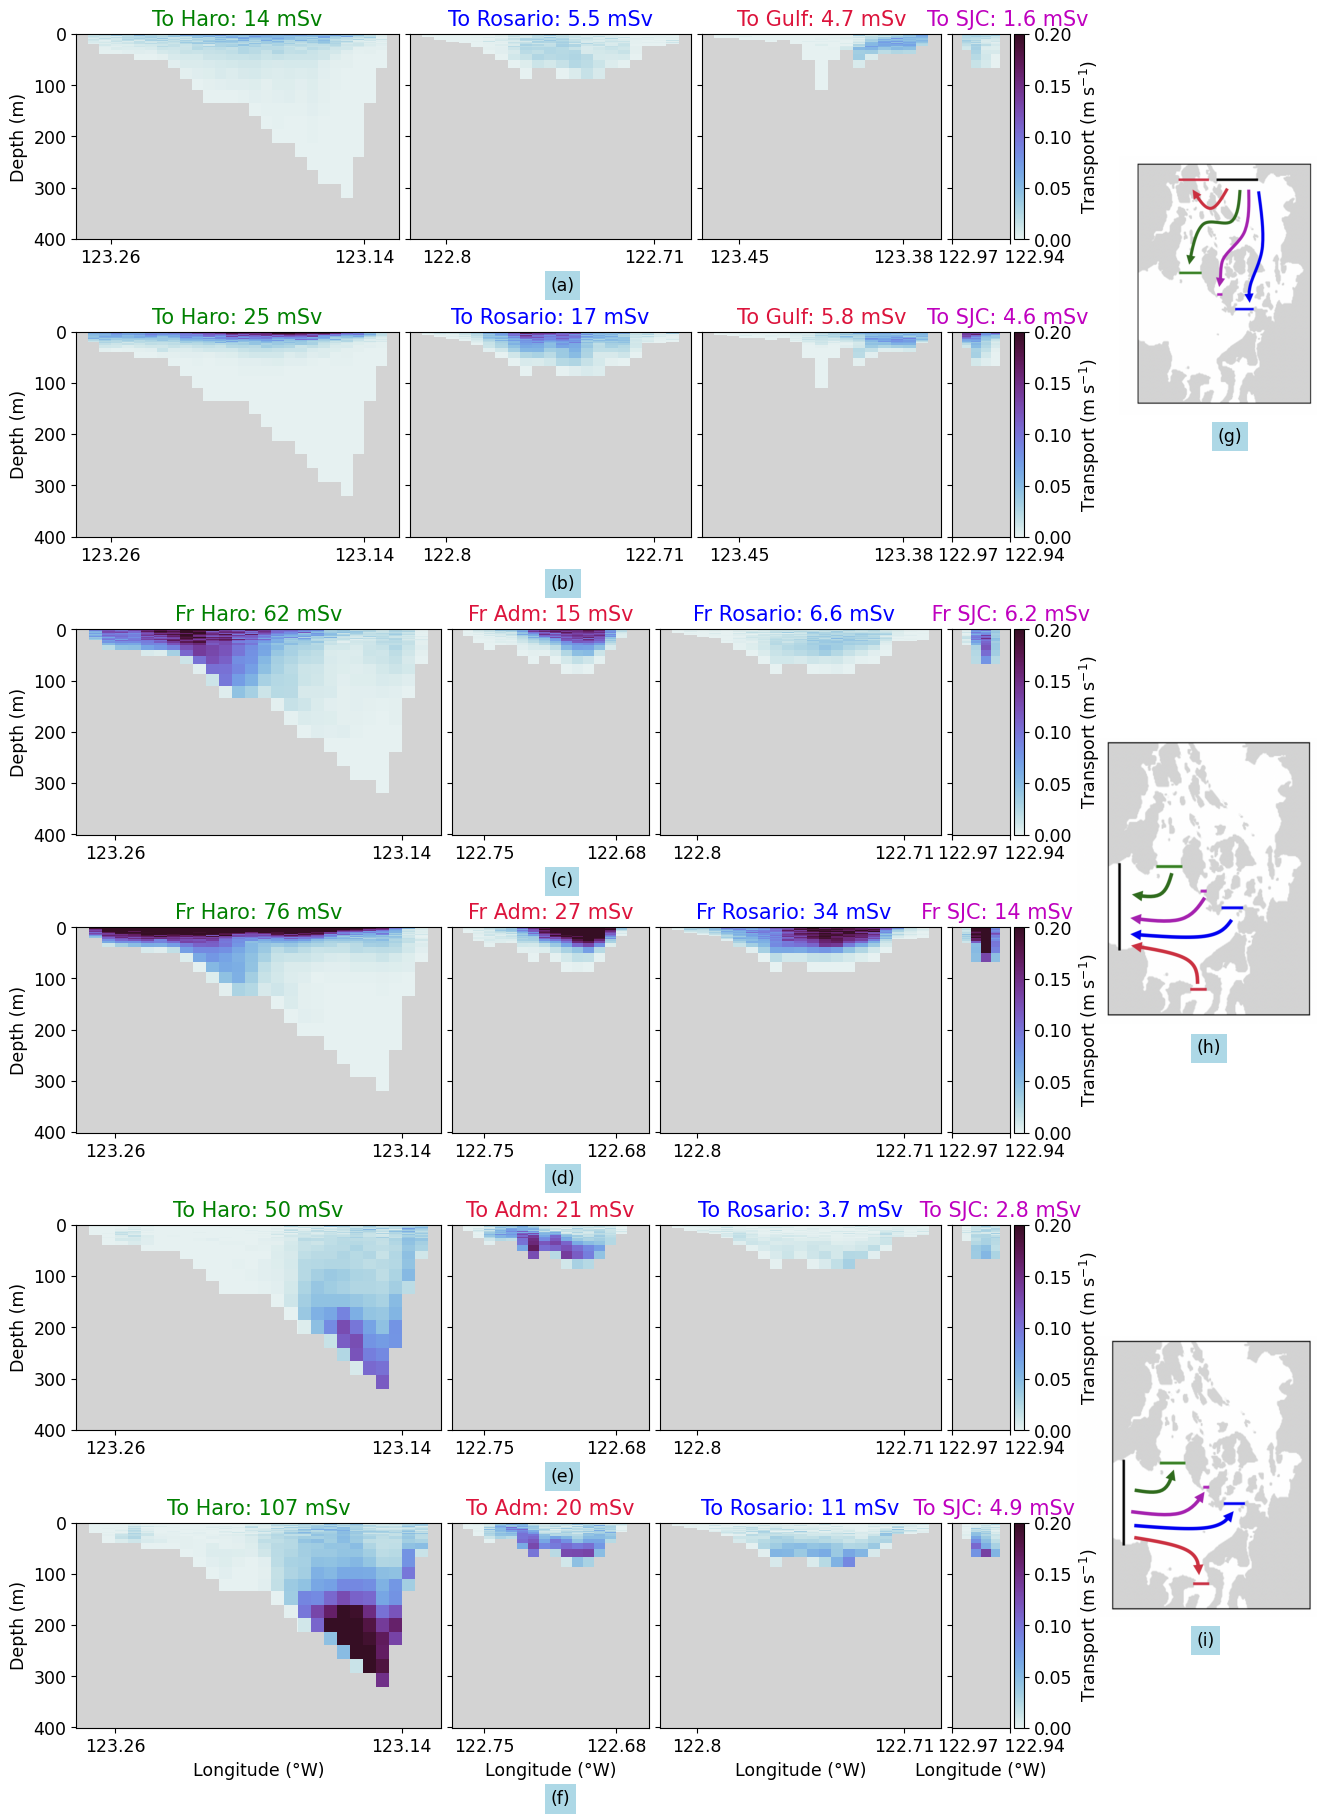

In [16]:
plt.rcParams.update({'font.size': 12.5})

title = 'To Haro: ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3)/1000)) + f' mSv'
title2 = 'To Rosario: ' + str(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'
title3 = '        To SJC: ' + str(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'
title4 = 'To Gulf: ' + str(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'

title5 = 'To Haro: ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'
title6 = 'To Rosario: ' + str(int(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'
title7 = '        To SJC: ' + str(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2)/1000) + f' mSv'
title8 = 'To Gulf: ' + str(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2)/1000) + f' mSv'

##SJGI widths (with gulf)
sum = 70+3
harolen =int(26/sum*25)
roslen = int(21/sum*25)
sjclen = int((5+3)/sum*25)
gulflen = int(18/sum*25)
totalallen = harolen+roslen+sjclen+gulflen

fig = plt.figure( figsize=[16,22])
gs = GridSpec(6,30,figure=fig)
# gs_parent = fig.add_gridspec(2, 1, height_ratios=[0.33, 0.67], hspace=0.13)
# gs_top = gs_parent[0].subgridspec(2, 16, width_ratios=[1, 1, 1, 1.2], hspace=0.25, wspace=0.2)
# gs_bottom = gs_parent[1].subgridspec(4, 16, width_ratios=[1, 1, 1, 1.2], hspace=0.25, wspace=0.12)

ax1 = fig.add_subplot(gs[0, :harolen]) 
ax2 = fig.add_subplot(gs[0,harolen:harolen+roslen])
ax3 = fig.add_subplot(gs[0,harolen+roslen:harolen+roslen+gulflen])
ax4 = fig.add_subplot(gs[0,harolen+roslen+gulflen:harolen+roslen+gulflen+sjclen])
ax5 = fig.add_subplot(gs[1, :harolen]) 
ax6 = fig.add_subplot(gs[1,harolen:harolen+roslen])
ax7 = fig.add_subplot(gs[1,harolen+roslen:harolen+roslen+gulflen])
ax8 = fig.add_subplot(gs[1,harolen+roslen+gulflen:harolen+roslen+gulflen+sjclen])

############
#SJGI
############

ax_center = fig.add_subplot(gs[:2,harolen+roslen+gulflen+sjclen+2: ])
ax_center.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fpr.png'),zorder=0)
ax_center.axis('off');

plotCS(ax1,dict_all['prtoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_z'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax2,dict_all['prtoros']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS2(ax4,dict_all['prtosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_z'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['prtogulf']['final_lon'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_z'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_dec]].dropna(),lonWg1,lonEg1,latg1,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['prtoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_z'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax6,dict_all['prtoros']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS2(ax8,dict_all['prtosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_z'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax7,dict_all['prtogulf']['final_lon'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_z'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_jun]].dropna(),lonWg1,lonEg1,latg1,38,0.2,23*days_month[idx_jun],title8,False,False)


ax1.set_title(title,color='green')
ax2.set_title(title2,color='b')
ax3.set_title(title4,color='crimson')
ax4.set_title(title3,color='m')
ax5.set_title(title5,color='green')
ax6.set_title(title6,color='b')
ax7.set_title(title8,color='crimson')
ax8.set_title(title7,color='m')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('')
ax8.set_xlabel('')
# ax1.set_xticklabels('')
# ax2.set_xticklabels('')
# ax3.set_xticklabels('')
# ax4.set_xticklabels('');

ax2.text(0.5, -0.25, "(a)", transform=ax2.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax6.text(0.5, -0.25, "(b)", transform=ax6.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax_center.text(0.5, -0.1, "(g)", transform=ax_center.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))

# ############
# #EJdF
# ############

##EJdF widths (w adm)
sum = 67+3
harolen =int(26/sum*25)
roslen = int(21/sum*25)
sjclen = int((5+3)/sum*25)
admlen = int(15/sum*25)
totalallen = harolen+roslen+sjclen+admlen

ax101 = fig.add_subplot(gs[2, :harolen]) 
ax21 = fig.add_subplot(gs[2,harolen:harolen+admlen])
ax31 = fig.add_subplot(gs[2,harolen+admlen:harolen+admlen+roslen])
ax41 = fig.add_subplot(gs[2,harolen+admlen+roslen:harolen+admlen+sjclen+roslen])
ax51 = fig.add_subplot(gs[3, :harolen]) 
ax61 = fig.add_subplot(gs[3,harolen:harolen+admlen])
ax71 = fig.add_subplot(gs[3,harolen+admlen:harolen+roslen+admlen])
ax81 = fig.add_subplot(gs[3,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])
ax9 = fig.add_subplot(gs[4, :harolen]) 
ax10 = fig.add_subplot(gs[4,harolen:harolen+admlen])
ax11 = fig.add_subplot(gs[4,harolen+admlen:harolen+roslen+admlen])
ax12 = fig.add_subplot(gs[4,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])
ax13 = fig.add_subplot(gs[5, :harolen]) 
ax14 = fig.add_subplot(gs[5,harolen:harolen+admlen])
ax15 = fig.add_subplot(gs[5,harolen+admlen:harolen+roslen+admlen])
ax16 = fig.add_subplot(gs[5,harolen+roslen+admlen:harolen+roslen+sjclen+admlen])

ax_center1 = fig.add_subplot(gs[2:4,harolen+roslen+sjclen+admlen+1:])
ax_center1.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_bvs.png'),zorder=0)
ax_center1.axis('off');

ax_center2 = fig.add_subplot(gs[4:,harolen+roslen+sjclen+admlen+1:])
ax_center2.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fvs.png'),zorder=0)
ax_center2.axis('off');

title = 'Fr Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3)/1000)) + f' mSv'
title2 = 'Fr Rosario: ' + str(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv  '
title3 = '         Fr SJC: ' + str(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'
title4 = 'Fr Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3)/1000)) + f' mSv'

title5 = 'Fr Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'
title6 = 'Fr Rosario: ' + str(int(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv  '
title7 = '     Fr SJC: ' + str(int(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'
title8 = 'Fr Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'

plotCS(ax101,dict_all['harotovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax31,dict_all['rostovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS2(ax41,dict_all['sjctovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax21,dict_all['admtovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax51,dict_all['harotovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax71,dict_all['rostovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS2(ax81,dict_all['sjctovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax61,dict_all['admtovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax101.set_title(title,color='green')
ax21.set_title(title4,color='crimson')
ax31.set_title(title2,color='b')
ax41.set_title(title3,color='m')
ax51.set_title(title5,color='green')
ax61.set_title(title8,color='crimson')
ax71.set_title(title6,color='b')
ax81.set_title(title7,color='m')

title = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3)/1000)) + f' mSv'
title2 = 'To Rosario: ' + str(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'
title3 = '      To SJC: ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2)/1000) + f' mSv'
title4 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3)/1000)) + f' mSv'

title5 = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'
title6 = 'To Rosario: '  + str(int(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2)/1000)) + f' mSv'
title7 = '    To SJC: ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2)/1000) + f' mSv'
title8 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3)/1000)) + f' mSv'

plotCS(ax9,dict_all['vstoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax11,dict_all['vstoros3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS2(ax12,dict_all['vstosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax10,dict_all['vstoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax13,dict_all['vstoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax15,dict_all['vstoros3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS2(ax16,dict_all['vstosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax14,dict_all['vstoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax101.set_xlabel('')
ax21.set_xlabel('')
ax31.set_xlabel('')
ax41.set_xlabel('')
ax51.set_xlabel('')
ax61.set_xlabel('')
ax71.set_xlabel('')
ax81.set_xlabel('')
ax9.set_xlabel('')
ax10.set_xlabel('')
ax11.set_xlabel('')
ax12.set_xlabel('')

ax9.set_title(title,color='green')
ax10.set_title(title4,color='crimson')
ax11.set_title(title2,color='b')
ax12.set_title(title3,color='m')
ax13.set_title(title5,color='green')
ax14.set_title(title8,color='crimson')
ax15.set_title(title6,color='b')
ax16.set_title(title7,color='m')

# ax101.set_xticklabels([])
# ax21.set_xticklabels([])
# ax31.set_xticklabels([])
# ax41.set_xticklabels([])
# ax51.set_xticklabels([])
# ax61.set_xticklabels([])
# ax71.set_xticklabels([])
# ax81.set_xticklabels([])
# ax9.set_xticklabels([])
# ax10.set_xticklabels([])
# ax11.set_xticklabels([])
# ax12.set_xticklabels([])

ax21.text(0.5, -0.25, "(c)", transform=ax21.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax61.text(0.5, -0.25, "(d)", transform=ax61.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax10.text(0.5, -0.25, "(e)", transform=ax10.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax14.text(0.5, -0.37, "(f)", transform=ax14.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax_center1.text(0.5, -0.1, "(h)", transform=ax_center1.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax_center2.text(0.5, -0.1, "(i)", transform=ax_center2.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))

fig.subplots_adjust(wspace=0.35,hspace=0.45)

In [15]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/all_sections_wmap.png',bbox_inches='tight')